# 零基础实战机器学习

## 第15讲 会员流失情况判断

作者 黄佳

极客时间专栏链接：https://time.geekbang.org/column/intro/438


问题：判断易速鲜花会员的是否会流失情况

易速鲜花公司拥有多年的会员记录，以及会员停止续费的情况。

通过逻辑回归和神经网络等机器学习模型，我们可以判断出客户是否离开，这是一个典型的的二元分类问题。


## 数据的读入和预处理

In [1]:
import numpy as np # 导入NumPy
import pandas as pd # 导入Pandas
import matplotlib.pyplot as plt # 导入matplotlib.pyplot

In [2]:
df_member = pd.read_csv('易速鲜花会员留存.csv') # 导入数据包
df_member #显示数据

,用户码,性别,玫瑰套餐,紫罗兰套餐,郁金香套餐,百合套餐,康乃馨套餐,胡姬花套餐,生日套餐,情人节套餐,会员卡类型,入会月数,会费支付方式,平均月消费,总消费,已停付会费
0,1,女,是,是,否,是,否,是,是,否,年卡,9,手工转账,65.60,593.3,否
1,2,男,否,否,否,否,否,否,否,是,月卡,9,手工转账,59.90,542.4,否
2,3,男,否,否,否,否,是,否,否,否,月卡,4,就餐时付费,73.90,280.85,是
3,4,男,是,否,否,是,是,否,是,是,月卡,13,就餐时付费,98.00,1237.85,是
4,5,女,否,是,否,否,否,是,是,是,月卡,9,花呗付款,69.40,571.45,否
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,7039,女,否,否,是,否,否,是,否,否,年卡,13,手工转账,55.15,742.9,否
7039,7040,男,否,否,否,是,否,否,否,否,月卡,2,手工转账,50.30,92.75,否
7040,7041,男,是,否,否,否,否,否,否,是,月卡,22,就餐时付费,85.10,1873.7,是
7041,7042,男,是,是,是,否,是,是,否,是,双年卡,67,手工转账,67.85,4627.65,否


### 数据清洗

In [3]:
#把总消费字段转换成数值字段
df_member['总消费'] = pd.to_numeric(df_member['总消费'], errors='coerce')
df_member['总消费'].fillna(0, inplace=True)

C:\Users\rossliao\AppData\Local\Temp\ipykernel_2816\1411086543.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_member['总消费'].fillna(0, inplace=True)


### 数据可视化

C:\Users\rossliao\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 29992 (\N{CJK UNIFIED IDEOGRAPH-7528}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\rossliao\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 25143 (\N{CJK UNIFIED IDEOGRAPH-6237}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\rossliao\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 30721 (\N{CJK UNIFIED IDEOGRAPH-7801}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\rossliao\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 22899 (\N{CJK UNIFIED IDEOGRAPH-5973}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\rossliao\AppData\Local\

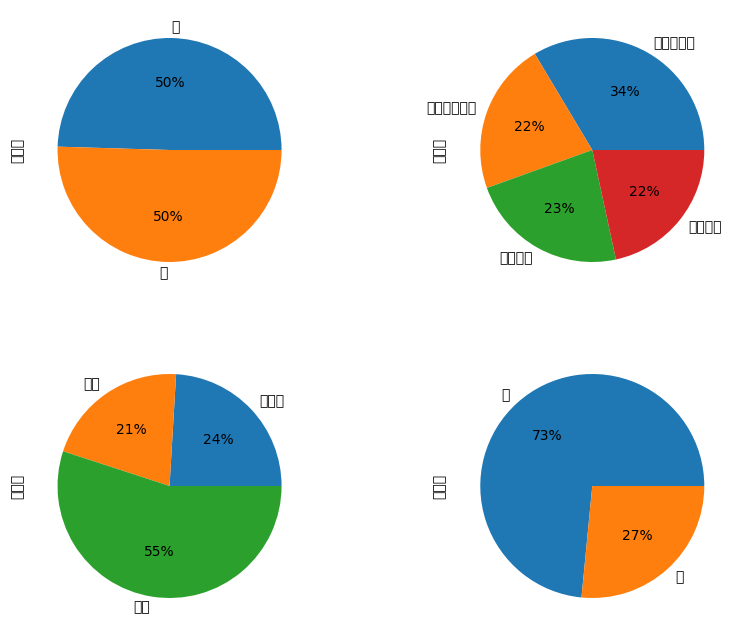

In [4]:
plt.figure(figsize=(10,8))
plt.subplot(2, 2, 1)
ax = df_member.groupby('性别').count()['用户码'].plot.pie(autopct='%1.0f%%') #饼图
plt.subplot(2, 2, 2)
ax = df_member.groupby('会费支付方式').count()['用户码'].plot.pie(autopct='%1.0f%%') #饼图
plt.subplot(2, 2, 3)
ax = df_member.groupby('会员卡类型').count()['用户码'].plot.pie(autopct='%1.0f%%') #饼图
plt.subplot(2, 2, 4)
ax = df_member.groupby('已停付会费').count()['用户码'].plot.pie(autopct='%1.0f%%') #饼图
plt.show() #显示

### 特征工程

In [5]:
df_member['已停付会费'].replace(to_replace='是', value=1, inplace=True) #流失-1
df_member['已停付会费'].replace(to_replace='否',  value=0, inplace=True) #未流失-0

C:\Users\rossliao\AppData\Local\Temp\ipykernel_2816\1263449143.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_member['已停付会费'].replace(to_replace='是', value=1, inplace=True) #流失-1
C:\Users\rossliao\AppData\Local\Temp\ipykernel_2816\1263449143.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always 

In [6]:
df_member['性别'].replace(to_replace='女', value=0, inplace=True) #女生-0
df_member['性别'].replace(to_replace='男', value=1, inplace=True) #男生-1

C:\Users\rossliao\AppData\Local\Temp\ipykernel_2816\2596809050.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_member['性别'].replace(to_replace='女', value=0, inplace=True) #女生-0
C:\Users\rossliao\AppData\Local\Temp\ipykernel_2816\2596809050.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always beh

In [7]:
# 字段中'Yes' or 'No'转换成为模型可以读取的数值,（布尔型数据，也是数值数据）
binary_features = ['玫瑰套餐', '紫罗兰套餐', '郁金香套餐', '百合套餐', '康乃馨套餐', '胡姬花套餐', 
                   '生日套餐','情人节套餐']
for field in binary_features:
    df_member[field] = df_member[field] == '是'

In [8]:
df_member

,用户码,性别,玫瑰套餐,紫罗兰套餐,郁金香套餐,百合套餐,康乃馨套餐,胡姬花套餐,生日套餐,情人节套餐,会员卡类型,入会月数,会费支付方式,平均月消费,总消费,已停付会费
0,1,0,True,True,False,True,False,True,True,False,年卡,9,手工转账,65.60,593.30,0
1,2,1,False,False,False,False,False,False,False,True,月卡,9,手工转账,59.90,542.40,0
2,3,1,False,False,False,False,True,False,False,False,月卡,4,就餐时付费,73.90,280.85,1
3,4,1,True,False,False,True,True,False,True,True,月卡,13,就餐时付费,98.00,1237.85,1
4,5,0,False,True,False,False,False,True,True,True,月卡,9,花呗付款,69.40,571.45,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,7039,0,False,False,True,False,False,True,False,False,年卡,13,手工转账,55.15,742.90,0
7039,7040,1,False,False,False,True,False,False,False,False,月卡,2,手工转账,50.30,92.75,0
7040,7041,1,True,False,False,False,False,False,False,True,月卡,22,就餐时付费,85.10,1873.70,1
7041,7042,1,True,True,True,False,True,True,False,True,双年卡,67,手工转账,67.85,4627.65,0


### 数据整理
先做数据整理工作，把每个数据字段都转换为可以处理的字段

In [9]:
# 分类字段哑变量
category_features = ['会员卡类型', '会费支付方式']
df_member = pd.get_dummies(df_member, drop_first=True, columns=category_features)
df_member

,用户码,性别,玫瑰套餐,紫罗兰套餐,郁金香套餐,百合套餐,康乃馨套餐,胡姬花套餐,生日套餐,情人节套餐,入会月数,平均月消费,总消费,已停付会费,会员卡类型_年卡,会员卡类型_月卡,会费支付方式_微信自动扣款,会费支付方式_手工转账,会费支付方式_花呗付款
0,1,0,True,True,False,True,False,True,True,False,9,65.60,593.30,0,True,False,False,True,False
1,2,1,False,False,False,False,False,False,False,True,9,59.90,542.40,0,False,True,False,True,False
2,3,1,False,False,False,False,True,False,False,False,4,73.90,280.85,1,False,True,False,False,False
3,4,1,True,False,False,True,True,False,True,True,13,98.00,1237.85,1,False,True,False,False,False
4,5,0,False,True,False,False,False,True,True,True,9,69.40,571.45,0,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,7039,0,False,False,True,False,False,True,False,False,13,55.15,742.90,0,True,False,False,True,False
7039,7040,1,False,False,False,True,False,False,False,False,2,50.30,92.75,0,False,True,False,True,False
7040,7041,1,True,False,False,False,False,False,False,True,22,85.10,1873.70,1,False,True,False,False,False
7041,7042,1,True,True,True,False,True,True,False,True,67,67.85,4627.65,0,False,False,False,True,False


### 构建特征集和标签集

In [10]:
X = df_member.drop(['用户码','已停付会费'], axis = 1) # 构建特征集，用户码字段属于无用特征
y = df_member.已停付会费.values # 构建标签集

### 拆分数据集

In [11]:
from sklearn.model_selection import train_test_split #导入train_test_split模块
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2) #拆分数据集

## 选择算法

这里我们比较逻辑回归和神经网络两种算法

### 逻辑回归模型

### 导入模型

In [12]:
from sklearn.linear_model import LogisticRegression #导入逻辑回归模型
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

# 创建模型
model_dt = DecisionTreeClassifier(max_depth=5, random_state=42)
# 创建模型
model_xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
lr = LogisticRegression(max_iter=1000) # lr,就代表是逻辑回归模型
svm = SVC(kernel='linear', probability=False, random_state=42, verbose=True, max_iter=1000) # 支持向量集
model_nb = GaussianNB()
model_rf = RandomForestClassifier(
    n_estimators=100, max_depth=5, random_state=42
)
print(X_train.shape)

(5634, 17)


### 训练机器

In [13]:
import time

start_time = time.time()
lr.fit(X_train,y_train) # fit,就相当于是梯度下降
print("lr time elaps {}".format(time.time() - start_time))

start_time = time.time()
svm.fit(X_train, y_train)
print("svm time elaps {}".format(time.time() - start_time))

start_time = time.time()
model_nb.fit(X_train, y_train)
print("model_nb time elaps {}".format(time.time() - start_time))

start_time = time.time()
model_xgb.fit(X_train, y_train)
print("model_xgb time elaps {}".format(time.time() - start_time))

start_time = time.time()
model_rf.fit(X_train, y_train)
print("model_rf time elaps {}".format(time.time() - start_time))

start_time = time.time()
model_dt.fit(X_train, y_train)
print("model_dt time elaps {}".format(time.time() - start_time))


y_pred_nb = model_nb.predict(X_test)
y_pred_lr = lr.predict(X_test)
y_pred_svm = svm.predict(X_test)
y_pred_xgb = model_xgb.predict(X_test)
y_pred_rf = model_rf.predict(X_test)
y_pred_dt = model_dt.predict(X_test)


C:\Users\rossliao\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


lr time elaps 2.0269100666046143
[LibSVM]

C:\Users\rossliao\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


svm time elaps 0.22834539413452148
model_nb time elaps 0.011535882949829102


C:\Users\rossliao\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\training.py:183: UserWarning: [18:12:42] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


model_xgb time elaps 1.0146996974945068
model_rf time elaps 0.989250898361206
model_dt time elaps 0.03712821006774902


### 评估分数

In [14]:
print("SK-learn逻辑回归预测准确率{:.2f}%".format(lr.score(X_test,y_test)*100))
print("SK-learn svm预测准确率{:.2f}%".format(svm.score(X_test,y_test)*100))
print("SK-learn 朴素贝叶斯预测准确率{:.2f}%".format(model_nb.score(X_test,y_test)*100))
print("SK-learn xgboost预测准确率{:.2f}%".format(model_xgb.score(X_test,y_test)*100))
print("SK-learn 随机森林预测准确率{:.2f}%".format(model_rf.score(X_test,y_test)*100))
print("SK-learn 决策树预测准确率{:.2f}%".format(model_dt.score(X_test,y_test)*100))

print("===")
print("真值 {}".format(y_test[3]))
print("y_pred_nb {}".format(y_pred_nb[3]))
print("y_pred_lr {}".format(y_pred_lr[3]))
print("y_pred_svm {}".format(y_pred_svm[3]))
print("y_pred_xgb {}".format(y_pred_xgb[3]))
print("y_pred_rf {}".format(y_pred_rf[3]))
print("y_pred_dt {}".format(y_pred_dt[3]))


SK-learn逻辑回归预测准确率80.91%
SK-learn svm预测准确率75.73%
SK-learn 朴素贝叶斯预测准确率71.47%
SK-learn xgboost预测准确率78.57%
SK-learn 随机森林预测准确率81.83%
SK-learn 决策树预测准确率79.06%
===
真值 0
y_pred_nb 0
y_pred_lr 0
y_pred_svm 0
y_pred_xgb 0
y_pred_rf 0
y_pred_dt 0


                     Accuracy   ROC AUC
Naive Bayes          0.714691  0.741793
Logistic Regression  0.809084  0.726183
SVM                  0.757275  0.712335
XGBoost              0.785664  0.701522
Random Forest        0.818311  0.702414
Decision Tree        0.790632  0.718120


C:\Users\rossliao\AppData\Local\Temp\ipykernel_2816\2680635258.py:23: UserWarning: Glyph 27169 (\N{CJK UNIFIED IDEOGRAPH-6A21}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\rossliao\AppData\Local\Temp\ipykernel_2816\2680635258.py:23: UserWarning: Glyph 22411 (\N{CJK UNIFIED IDEOGRAPH-578B}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\rossliao\AppData\Local\Temp\ipykernel_2816\2680635258.py:23: UserWarning: Glyph 24615 (\N{CJK UNIFIED IDEOGRAPH-6027}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\rossliao\AppData\Local\Temp\ipykernel_2816\2680635258.py:23: UserWarning: Glyph 33021 (\N{CJK UNIFIED IDEOGRAPH-80FD}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\rossliao\AppData\Local\Temp\ipykernel_2816\2680635258.py:23: UserWarning: Glyph 27604 (\N{CJK UNIFIED IDEOGRAPH-6BD4}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\rossliao\AppData\Local\Temp\ipykernel_2816\2680635258.py:23: UserWarning: Gl

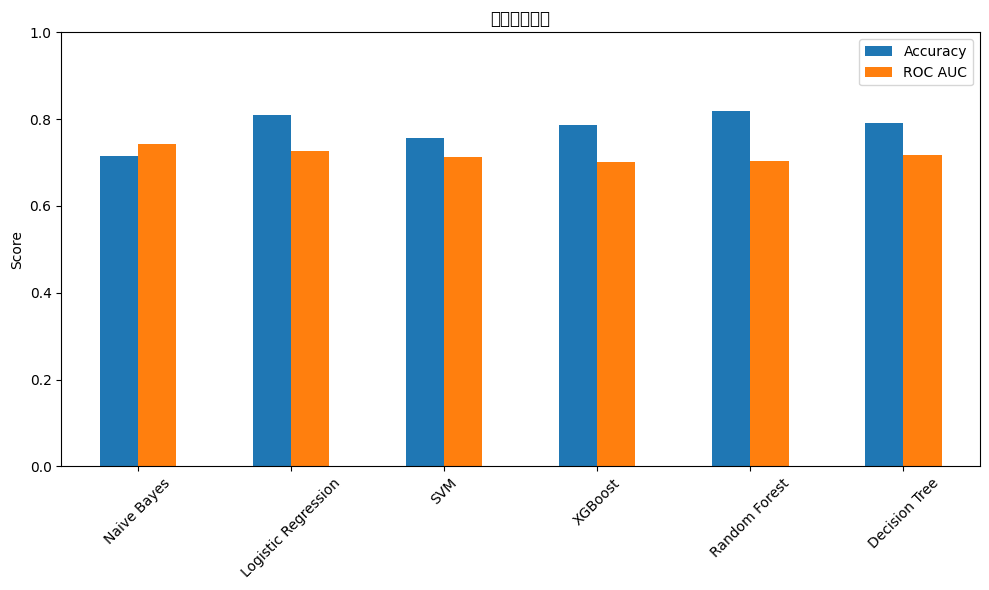

In [15]:
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# 汇总所有模型的准确率和 ROC AUC
results = {
    "Naive Bayes": [accuracy_score(y_test, y_pred_nb), roc_auc_score(y_test, y_pred_nb)],
    "Logistic Regression": [accuracy_score(y_test, y_pred_lr), roc_auc_score(y_test, y_pred_lr)],
    "SVM": [accuracy_score(y_test, y_pred_svm), roc_auc_score(y_test, y_pred_svm)],
    "XGBoost": [accuracy_score(y_test, y_pred_xgb), roc_auc_score(y_test, y_pred_xgb)],
    "Random Forest": [accuracy_score(y_test, y_pred_rf), roc_auc_score(y_test, y_pred_rf)],
    "Decision Tree": [accuracy_score(y_test, y_pred_dt), roc_auc_score(y_test, y_pred_dt)],
}

# 转换为 DataFrame
results_df = pd.DataFrame(results, index=["Accuracy", "ROC AUC"]).T
print(results_df)

# 可视化比较
results_df.plot(kind='bar', figsize=(10, 6), ylim=(0, 1), title="模型性能比较")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 预测结果

In [16]:
y_pred=lr.predict(X_test)
print("逻辑回归对测试集第一个用户的预测结果", y_pred[0])

逻辑回归对测试集第一个用户的预测结果 0


### 神经网络模型

In [17]:
#!pip install keras
#!pip install tensorflow

In [18]:
import keras # 导入Keras库
from keras.models import Sequential # 导入Keras序贯模型
from keras.layers import Dense # 导入Keras密集连接层
dnn = Sequential() # 创建一个序贯DNN模型
dnn.add(Dense(units=12, input_dim=17, activation = 'relu')) # 添加输入层
dnn.add(Dense(units=24, activation = 'relu')) # 添加隐层
dnn.add(Dense(units=1, activation = 'sigmoid')) # 添加输出层
dnn.summary() # 显示网络模型（这个语句不是必须的）
# 编译神经网络，指定优化器，损失函数，以及评估标准
dnn.compile(optimizer = 'RMSProp', #优化器
            loss = 'binary_crossentropy', #损失函数
            metrics = ['acc']) #评估标准

C:\Users\rossliao\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 12)                  │             216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 24)                  │             312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              25 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 553 (2.16 KB)

 Trainable params: 553 (2.16 KB)

 Non-trainable params: 0 (0.00 B)

In [19]:
X_train.shape #X_train目前的形状
print(type(X_train))
print(type(X_test))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [20]:
X_train = np.asarray(X_train).astype(np.float32) # 转换为NumPy张量
X_test = np.asarray(X_test).astype(np.float32) # 转换为NumPy张量

In [21]:
X_train.dtype #X_train转换后的类型

dtype('float32')

In [22]:
history = dnn.fit(X_train, y_train, # 指定训练集
                  epochs=30,        # 指定训练的轮次
                  batch_size=64,    # 指定数据批量
                  validation_split=0.2) #这里直接从训练集数据中拆分验证集，更方便

Epoch 1/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - acc: 0.5780 - loss: 22.8038 - val_acc: 0.7098 - val_loss: 3.7839
Epoch 2/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - acc: 0.6670 - loss: 3.3851 - val_acc: 0.4321 - val_loss: 1.9674
Epoch 3/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - acc: 0.6577 - loss: 3.1438 - val_acc: 0.7107 - val_loss: 2.3740
Epoch 4/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - acc: 0.6736 - loss: 2.8371 - val_acc: 0.5280 - val_loss: 1.1156
Epoch 5/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - acc: 0.7003 - loss: 2.8676 - val_acc: 0.2893 - val_loss: 7.8448
Epoch 6/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - acc: 0.6804 - loss: 3.1109 - val_acc: 0.4419 - val_loss: 3.4715
Epoch 7/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - acc: 0.6931 - loss: 2.3394 - val_acc: 0.7107 - val_loss: 0.6747
Epoch 8/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - acc: 0.7096 - loss: 2.2486 - val_acc: 0.6912 - val_loss: 0.5739
Epoch 9/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - acc: 0.7073 - loss

In [23]:
def show_history(history): # 显示训练过程中的学习曲线
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(loss) + 1)
    plt.figure(figsize=(12,4))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    plt.subplot(1, 2, 2)
    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show() 

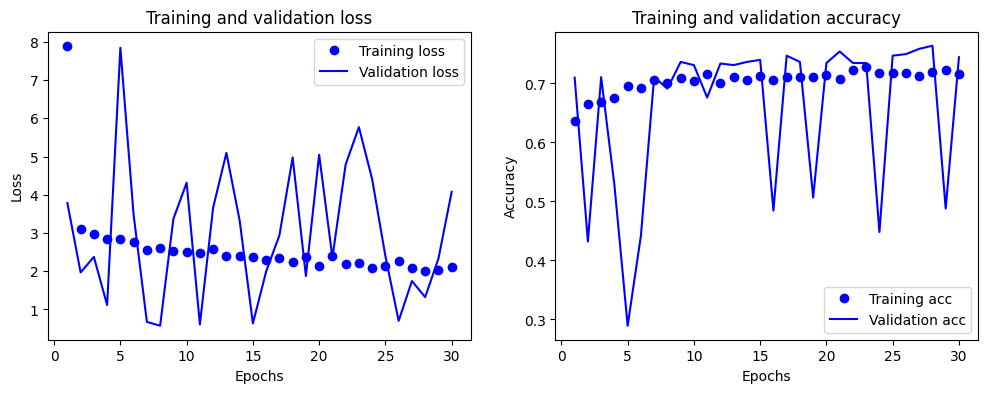

In [24]:
show_history(history) # 调用这个函数

In [25]:
result = dnn.evaluate(X_test, y_test) #评估测试集上的准确率
print('DNN的测试准确率为',"{0:.2f}%".format(result[1]*100))

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.7845 - loss: 2.9409
DNN的测试准确率为 78.21%


In [26]:
prediction = dnn.predict(X_test)
print('第一个用户分类结果为:', np.argmax(prediction[0]))

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
第一个用户分类结果为: 0


### 神经网络模型-归一化之后

In [27]:
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)

In [28]:
# X_train = np.asarray(X_train).astype(np.float32)
# X_test = np.asarray(X_test).astype(np.float32)

In [29]:
from sklearn.preprocessing import MinMaxScaler #导入归一化缩放器
scaler = MinMaxScaler() #创建归一化缩放器
X_train_minmax = scaler.fit_transform(X_train) #拟合并转换训练集数据
X_test_minmax = scaler.transform(X_test) #转换测试集数据

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Epoch 1/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - acc: 0.7376 - loss: 0.5972 - val_acc: 0.7125 - val_loss: 0.5672
Epoch 2/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - acc: 0.7390 - loss: 0.5230 - val_acc: 0.7134 - val_loss: 0.5194
Epoch 3/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - acc: 0.7494 - loss: 0.4695 - val_acc: 0.7391 - val_loss: 0.4946
Epoch 4/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - acc: 0.7950 - loss: 0.4407 - val_acc: 0.7569 - val_loss: 0.4812
Epoch 5/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - acc: 0.7747 - loss: 0.4447 - val_acc: 0.7595 - val_loss: 0.4756
Epoch 6/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - acc: 0.7804 - loss: 0.4310 - val_acc: 0.7604 - val_loss: 0.4716
Epoch 7/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - acc: 0.7866 - loss: 0.4291 - val_acc: 0.7649 - val_loss: 0.4692
Epoch 8/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - acc: 0.7934 - loss: 0.4298 - val_acc: 0.7675 - val_loss: 0.4666
Epoch 9/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - acc: 0.7895 - loss:

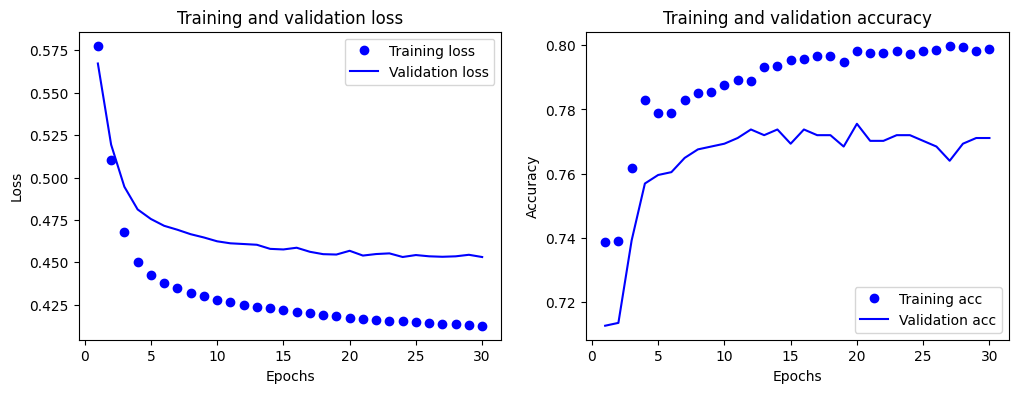

In [30]:
history = dnn.fit(X_train_minmax, y_train, # 指定训练集
                  epochs=30,        # 指定训练的轮次
                  batch_size=64,    # 指定数据批量
                  validation_split=0.2) #指定验证集,这里为了简化模型，直接用训练集数据
show_history(history) # 调用这个函数

In [31]:
result = dnn.evaluate(X_test_minmax, y_test) #评估测试集上的准确率
print('DNN（归一化之后）的测试准确率为',"{0:.2f}%".format(result[1]*100))

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.8013 - loss: 0.4298
DNN（归一化之后）的测试准确率为 80.20%


### 使用归一化的数据集合

In [32]:
from sklearn.linear_model import LogisticRegression #导入逻辑回归模型
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
# 创建模型
model_dt = DecisionTreeClassifier(max_depth=5, random_state=42)
# 创建模型
model_xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
lr = LogisticRegression(max_iter=1000) # lr,就代表是逻辑回归模型
svm = SVC(kernel='linear', probability=False, random_state=42, verbose=True, max_iter=1000) # 支持向量集
model_nb = GaussianNB()
model_rf = RandomForestClassifier(
    n_estimators=100, max_depth=5, random_state=42
)


lr.fit(X_train_minmax,y_train) # fit,就相当于是梯度下降
svm.fit(X_train_minmax, y_train)
model_nb.fit(X_train_minmax, y_train)
model_xgb.fit(X_train_minmax, y_train)
model_rf.fit(X_train_minmax, y_train)
model_dt.fit(X_train_minmax, y_train)


y_pred_nb = model_nb.predict(X_test_minmax)
y_pred_lr = lr.predict(X_test_minmax)
y_pred_svm = svm.predict(X_test_minmax)
y_pred_xgb = model_xgb.predict(X_test_minmax)
y_pred_rf = model_rf.predict(X_test_minmax)
y_pred_dt = model_dt.predict(X_test_minmax)

print("SK-learn逻辑回归预测准确率{:.2f}%".format(lr.score(X_test_minmax,y_test)*100))
print("SK-learn svm预测准确率{:.2f}%".format(svm.score(X_test_minmax,y_test)*100))
print("SK-learn 朴素贝叶斯预测准确率{:.2f}%".format(model_nb.score(X_test_minmax,y_test)*100))
print("SK-learn xgboost预测准确率{:.2f}%".format(model_xgb.score(X_test_minmax,y_test)*100))
print("SK-learn 随机森林预测准确率{:.2f}%".format(model_rf.score(X_test_minmax,y_test)*100))
print("SK-learn 决策树预测准确率{:.2f}%".format(model_dt.score(X_test_minmax,y_test)*100))

print("===")
print("真值 {}".format(y_test[3]))
print("y_pred_nb {}".format(y_pred_nb[3]))
print("y_pred_lr {}".format(y_pred_lr[3]))
print("y_pred_svm {}".format(y_pred_svm[3]))
print("y_pred_xgb {}".format(y_pred_xgb[3]))
print("y_pred_rf {}".format(y_pred_rf[3]))
print("y_pred_dt {}".format(y_pred_dt[3]))


[LibSVM]

C:\Users\rossliao\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\rossliao\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\training.py:183: UserWarning: [18:14:05] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


SK-learn逻辑回归预测准确率80.70%
SK-learn svm预测准确率76.86%
SK-learn 朴素贝叶斯预测准确率71.61%
SK-learn xgboost预测准确率78.57%
SK-learn 随机森林预测准确率81.83%
SK-learn 决策树预测准确率79.06%
===
真值 0
y_pred_nb 0
y_pred_lr 0
y_pred_svm 0
y_pred_xgb 0
y_pred_rf 0
y_pred_dt 0


## 使用标准化的数据集合

In [33]:
from sklearn.linear_model import LogisticRegression #导入逻辑回归模型
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
# 创建模型
model_dt = DecisionTreeClassifier(max_depth=5, random_state=42)
# 创建模型
model_xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
lr = LogisticRegression(max_iter=1000) # lr,就代表是逻辑回归模型
svm = SVC(kernel='linear', probability=False, random_state=42, verbose=True, max_iter=1000) # 支持向量集
model_nb = GaussianNB()
model_rf = RandomForestClassifier(
    n_estimators=100, max_depth=5, random_state=42
)

print(X_train_scaled.shape)

lr.fit(X_train_scaled,y_train) # fit,就相当于是梯度下降
svm.fit(X_train_scaled, y_train)
model_nb.fit(X_train_scaled, y_train)
model_xgb.fit(X_train_scaled, y_train)
model_rf.fit(X_train_scaled, y_train)
model_dt.fit(X_train_scaled, y_train)


y_pred_nb = model_nb.predict(X_test_scaled)
y_pred_lr = lr.predict(X_test_scaled)
y_pred_svm = svm.predict(X_test_scaled)
y_pred_xgb = model_xgb.predict(X_test_scaled)
y_pred_rf = model_rf.predict(X_test_scaled)
y_pred_dt = model_dt.predict(X_test_scaled)

print("SK-learn逻辑回归预测准确率{:.2f}%".format(lr.score(X_test_scaled,y_test)*100))
print("SK-learn svm预测准确率{:.2f}%".format(svm.score(X_test_scaled,y_test)*100))
print("SK-learn 朴素贝叶斯预测准确率{:.2f}%".format(model_nb.score(X_test_scaled,y_test)*100))
print("SK-learn xgboost预测准确率{:.2f}%".format(model_xgb.score(X_test_scaled,y_test)*100))
print("SK-learn 随机森林预测准确率{:.2f}%".format(model_rf.score(X_test_scaled,y_test)*100))
print("SK-learn 决策树预测准确率{:.2f}%".format(model_dt.score(X_test_scaled,y_test)*100))

print("===")
print("真值 {}".format(y_test[3]))
print("y_pred_nb {}".format(y_pred_nb[3]))
print("y_pred_lr {}".format(y_pred_lr[3]))
print("y_pred_svm {}".format(y_pred_svm[3]))
print("y_pred_xgb {}".format(y_pred_xgb[3]))
print("y_pred_rf {}".format(y_pred_rf[3]))
print("y_pred_dt {}".format(y_pred_dt[3]))


(5634, 17)
[LibSVM]

C:\Users\rossliao\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\rossliao\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\training.py:183: UserWarning: [18:14:08] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


SK-learn逻辑回归预测准确率80.84%
SK-learn svm预测准确率61.89%
SK-learn 朴素贝叶斯预测准确率71.61%
SK-learn xgboost预测准确率78.57%
SK-learn 随机森林预测准确率81.83%
SK-learn 决策树预测准确率79.06%
===
真值 0
y_pred_nb 0
y_pred_lr 0
y_pred_svm 0
y_pred_xgb 0
y_pred_rf 0
y_pred_dt 0
